## Get Files

In [1]:
working_directory = 'DATA'

In [2]:
!dir DATA

 Volume in drive C is Local Disk
 Volume Serial Number is FE3C-B042

 Directory of C:\Users\luisf\github\Computer-Vision-Udemy\DATA

05/27/2020  11:08 AM    <DIR>          .
05/27/2020  11:08 AM    <DIR>          ..
05/27/2020  11:08 AM    <DIR>          .ipynb_checkpoints
05/27/2020  11:08 AM           193,288 00-puppy.jpg
05/27/2020  11:08 AM            46,400 bank_note_data.txt
05/27/2020  11:08 AM           500,238 bricks.jpg
05/27/2020  11:08 AM           494,070 cartoon_receipt.jpg
05/27/2020  11:08 AM            22,394 car_plate.jpg
05/27/2020  11:08 AM         1,036,601 chessboard_mat.jpg
05/27/2020  11:08 AM         2,918,981 coins_on_white.jpg
05/27/2020  11:08 AM           533,390 crossword.jpg
05/27/2020  11:08 AM         2,949,661 damien_hirst_dot.jpg
05/27/2020  11:08 AM           127,252 Denis_Mukwege.jpg
05/27/2020  11:08 AM           167,836 dog_backpack.jpg
05/27/2020  11:08 AM           167,836 dog_backpack.png
05/27/2020  11:08 AM             7,627 dot_grid.png
05/2

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def load_image(path, gray=False):
    if (gray):
        img = cv2.imread(path, 0)
    else:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if (img is None):
        print("could not read image in path: ", path)
    return img

def show_image(img, gray=False):
    if gray:
      plt.imshow(img, cmap='gray') 
    else:
      plt.imshow(img)
    plt.axis('off')
    plt.show()

def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

# Implement Face Detection

nadia


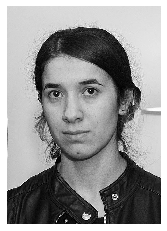

denis


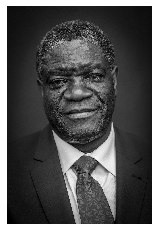

solvay


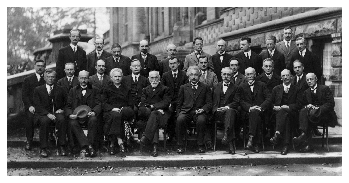

In [5]:
nadia = load_image(working_directory+'/Nadia_Murad.jpg', gray=True)
denis = load_image(working_directory+'/Denis_Mukwege.jpg', gray=True)
solvay = load_image(working_directory+'/solvay_conference.jpg', gray=True)

print("nadia")
show_image(nadia, gray=True)
print("denis")
show_image(denis, gray=True)
print("solvay")
show_image(solvay, gray=True)

## Detect using frontal face classifier

In [6]:
classifier = cv2.CascadeClassifier(working_directory+'/haarcascades/haarcascade_frontalface_default.xml')
classifier

<CascadeClassifier 0000019C2E1AB2B0>

In [7]:
def detect_face(img):
    face_img = img.copy()
    face_positions = classifier.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    for (x, y, width, height) in face_positions:
        cv2.rectangle(face_img, (x, y), (x+width, y+height), (255, 255, 255), thickness=10)
    return face_img

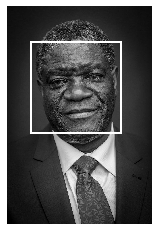

In [8]:
denis_result = detect_face(denis)
show_image(denis_result, gray=True)

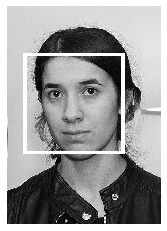

In [9]:
nadia_result = detect_face(nadia)
show_image(nadia_result, gray=True)

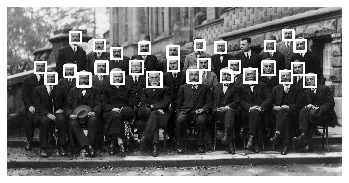

In [10]:
solvay_result = detect_face(solvay)
show_image(solvay_result, gray=True)

## Detect using eye classifier

In [11]:
eye_cascade_classifier = cv2.CascadeClassifier(working_directory+'/haarcascades/haarcascade_eye.xml')

In [12]:
def detect_eyes(img):
    face_img = img.copy()
    face_positions = eye_cascade_classifier.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    for (x, y, width, height) in face_positions:
        cv2.rectangle(face_img, (x, y), (x+width, y+height), (255, 255, 255), thickness=10)
    return face_img

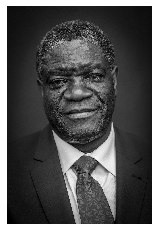

In [13]:
denis_result = detect_eyes(denis)
show_image(denis_result, gray=True)

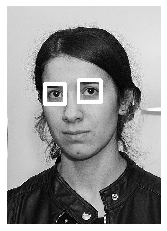

In [14]:
nadia_result = detect_eyes(nadia)
show_image(nadia_result, gray=True)

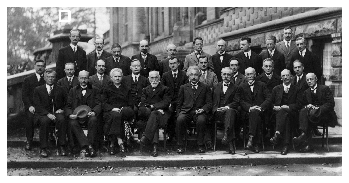

In [15]:
solvay_result = detect_eyes(solvay)
show_image(solvay_result, gray=True)

# Detect Face in Video

In [16]:
capture = cv2.VideoCapture(0)

while True:
    ret, frame = capture.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Video Face Detection', frame)
    
    k = cv2.waitKey(1)
    if k==27:
        break
        
capture.release()
cv2.destroyAllWindows()